---
# **CAPSTONE 3 - TELCO CUSTOMER CHURN PREDICTIVE ANALYSIS**
---

## **MACHINE LEARNING MODELING**
## *HANDIKA EKI WINATA - JCDS 0306*

---
## 1. DATA UNDERSTANDING
---

### Background

In the fiercely competitive realm of the telecommunications sector, grasping the nuances of customer churn is essential for continued growth. **Customer churn**, often termed as customer attrition, denotes the scenario where clients discontinue their association with a business or service. Specifically, within the telecommunications sphere, it signifies subscribers shifting their allegiance from one service provider to another. Various factors can trigger churn, such as dissatisfaction with service, enticing offers from rival companies, or changes in a customer's personal situation, to name a few.

This **Telco Customer Churn** dataset provides a comprehensive insight into the characteristics of individuals who have opted out of services from a telco firm. This dataset encompasses diverse attributes like the customer's duration with the company, the range of services they've availed, and the nature of their contract, among other aspects. At the heart of our exploration is the 'Churn' attribute, an indicator that decides if a customer has chosen to terminate their association with the firm.

### Problem Statement

Our goal is to decipher the patterns and trends that influence customer churn, using the vast data available to construct a predictive model that can reliably detect prospective churn clients. The underlying issue that drives this analysis is, "What are the key determinants of customer churn, and how can we use this information to accurately predict potential churn?" This project's objective is to provide telco firms with the knowledge they need to develop strategies that create long-term relationships with their customer base, thereby **"Reduce Retention Cost Spent by lowering the Churn Rate by the Company in Customer Retention Cost Strategy"**. One well-known critical business statistic is "*The cost of retaining an existing customer is far less than the cost of acquiring a new one*".

### Define Predictive Analysis Case

> Target:

0 (Negative) : Not Churn (Retained)

1 (Positive) : Churn (Turnover)

- True Positives (TP): Customers who were predicted to churn and actually churned
- True Negatives (TN): Customers who were predicted not to churn and actually did not churn
- False Positives (FP): Customers who were predicted to churn but did not actually churn (Type I error)
- False Negatives (FN): Customers who were predicted not to churn but actually churned (Type II error)

*In the context of customer churn, both types of errors can be costly for the business:*

- False Positives (FP): These are customers who were flagged as likely to churn but did not. If the company spends resources on retaining these customers, it might be seen as a waste, but it could potentially increase customer satisfaction and loyalty.

- False Negatives (FN): These are customers who were not flagged as likely to churn but did. This is generally seen as more problematic because the company loses out on the opportunity to retain customers who are unsatisfied with the service.

> In many business contexts, FN is often considered more seriously because retaining existing customers is usually less costly than acquiring new ones. Therefore, reducing the number of false negatives (i.e., identifying potential churn customers correctly) with aims to reduce the **Customer Retention Cost Strategy** might be seen as more important.

> Thus, `Recall` will be used as a baseline metrix to evaluate the models then **Customer Retention Cost Strategy** will be used as a judge to chose which model is the best for this project ✅

### Data Dictionary

| # | Feature | Description
| --- | --- | ---
| 1 | Dependents | Whether the customer has dependents or not
| 2 | tenure | Number of months the customer has stayed with the company
| 3 | OnlineSecurity | Whether the customer has online security or not
| 4 | OnlineBackup | Whether the customer has online backup or not
| 5 | InternetService | Whether the client is subscribed to Internet service
| 6 | DeviceProtection | Whether the client has device protection or not
| 7 | TechSupport | Whether the client has tech support or not
| 8 | Contract | Type of contract according to duration
| 9 | PaperlessBilling | Bills issued in paperless form
| 10 | MonthlyCharges | Amount of charge for service on monthly bases
| 11 | Churn | 1 if the customer Churn, 0 otherwise

---
## DATA CLEANING & EDA
---

In [55]:
!pip install category_encoders catboost lime shap

In [56]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from category_encoders import BinaryEncoder, OrdinalEncoder

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
# Import dataset from github repository
url = 'https://raw.githubusercontent.com/ekiwinataa/Capstone3_TelcoChurnAnalysis_ML/main/telco_customer_churn.csv'
df = pd.read_csv(url)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### Null Values & Data Type Check

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


> No Null values found & Data types are in a correct format

### Duplicated Data

In [59]:
df.duplicated().sum(), df.duplicated().sum() / len(df)

(77, 0.01561866125760649)

In [60]:
# Percentage of the "target" before dropping duplicated data

df['Churn'].value_counts() / len(df) * 100

No     73.306288
Yes    26.693712
Name: Churn, dtype: float64

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
# Percentage of the "target" after dropping duplicated data

df['Churn'].value_counts() / len(df) * 100

No     73.459716
Yes    26.540284
Name: Churn, dtype: float64

- It can be seen that the percentage of duplicated data in respect to overall data is weigthed very low at $0.02$%.
- Moreover, since this dataset is not having a unique ID feature, we cannot indicates wheather tha duplicated data is truly duplicated or is it just a coinsidence.
- Lastly, dropping them is not affecting the percentage of the `target` feature
- Thus, these duplicated data will be dropped

### Unique Values

In [63]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> `No internet service` value in several features can be classified as `No` since they are pointing the same meaning. Thus, replacement will be done to avoid missunderstanding

In [64]:
df[['OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport']] = df[['OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport']].replace(
                                                  {'No internet service' : 'No'})

In [65]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> Now the unique values are more simplified

In [66]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dependents,4853,2,No,3380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4853.0,NaN,NaN,NaN,32.679992,24.395554,0.0,9.0,29.0,56.0,72.0
OnlineSecurity,4853,2,No,3423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,4853,2,No,3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,4853,3,Fiber optic,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,4853,2,No,3165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,4853,2,No,3445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,4853,3,Month-to-month,2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,4853,2,Yes,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,4853.0,NaN,NaN,NaN,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65


### Imbalance Target

In [67]:
df['Churn'].value_counts(), df['Churn'].value_counts() / len(df) * 100

(No     3565
 Yes    1288
 Name: Churn, dtype: int64,
 No     73.459716
 Yes    26.540284
 Name: Churn, dtype: float64)

> It is very clear that the `target` is classified as imbalanced data. Thus, `resampling` method will be used later in the modeling step to ensure a balance data which might improve the reliability of the model itself

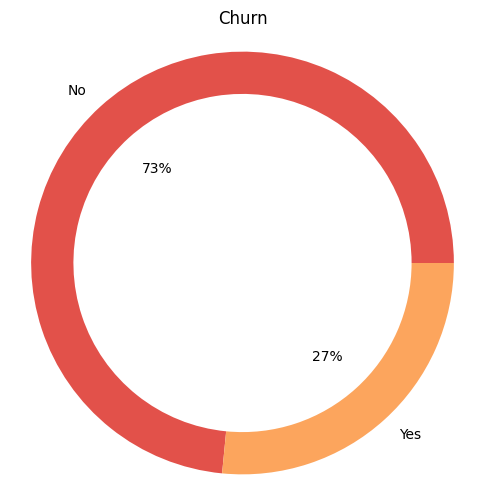

In [68]:
churn_count = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    churn_count,
    labels=churn_count.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},  # Set the width of the hole to create a donut
    colors=sns.color_palette("Spectral")
)
plt.title('Churn')
plt.axis('equal');

# plt.savefig('problem_statement.png')

> From 4853 clients, 27% of them are turning over from our company which is very worth to be considered since it will affect our overall business. Thus, reducing this number will be our main focus to achieve more loyal customer which will give a positive impact into the business

### Possible Churn Customer

> Grouping the tenure into few categories to see which category chosen by customer that are more likely to affect customer decision to Churn

In [69]:
# Define the tenure bins and labels
tenure_bins = [0, 12, 24, 36, 48, 60, float('inf')]  # Custom bin edges
tenure_labels = ['1y', '2y', '3y', '4y', '5y', '>5y']

# Add a new column for tenure categories
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
df['tenure_category'].value_counts()


1y     1396
>5y    1018
2y     721 
3y     616 
5y     586 
4y     516 
Name: tenure_category, dtype: int64

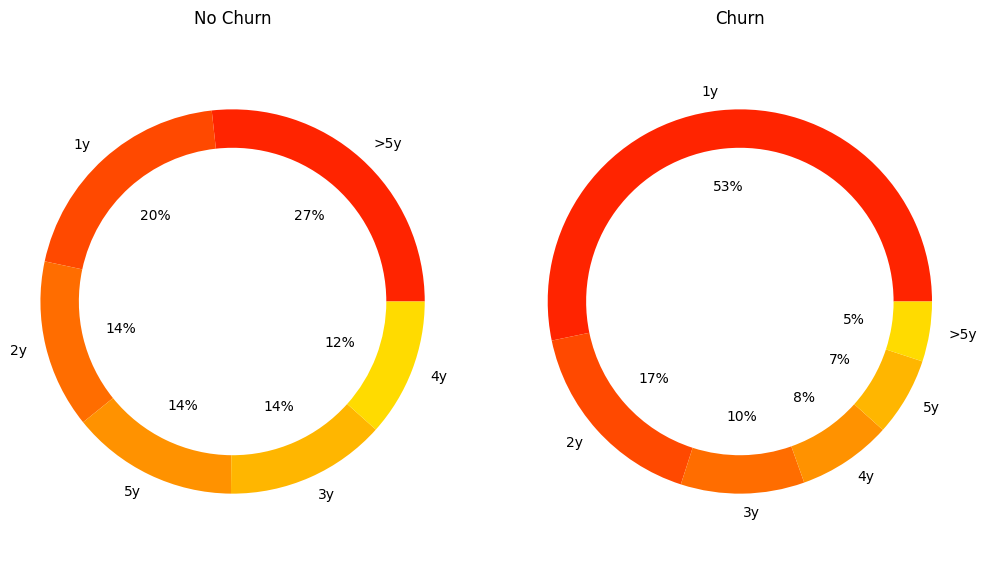

In [71]:
# Devide the Churn and count them
tenure_churn_no = df[df['Churn'] == 'No']['tenure_category'].value_counts()
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure_category'].value_counts()

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Plot for Churn = No
axes[0].pie(
    tenure_churn_no,
    labels=tenure_churn_no.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
    colors=sns.color_palette("autumn")
)
axes[0].set_title('No Churn')
axes[0].axis('equal')

# Plot for Churn = Yes
axes[1].pie(
    tenure_churn_yes,
    labels=tenure_churn_yes.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
    colors=sns.color_palette("autumn")
)
axes[1].set_title('Churn')
axes[1].axis('equal');

# plt.savefig('Churn_by_Category.png')


> Here, we can see that after categorizing the tenure, we can observe that most of the Churn customer came from the tenure of below 1 year. Thus, this client is considered as new customer and they are likely not satisfied in our service then decide to turnover into other service provider.

In [72]:
# Drop the tenure category feature as it is not needed in the modeling

df.drop(columns='tenure_category', inplace=True)

### Feature Insight

In [73]:
# Grouping features that are categorical

cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O'))]
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [74]:
for i in cat_features:
    print(df[i].value_counts() / len(df) * 100)
    print()

No     69.647641
Yes    30.352359
Name: Dependents, dtype: float64

No     70.533691
Yes    29.466309
Name: OnlineSecurity, dtype: float64

No     64.92891
Yes    35.07109
Name: OnlineBackup, dtype: float64

Fiber optic    44.384917
DSL            34.947455
No             20.667628
Name: InternetService, dtype: float64

No     65.217391
Yes    34.782609
Name: DeviceProtection, dtype: float64

No     70.987018
Yes    29.012982
Name: TechSupport, dtype: float64

Month-to-month    54.914486
Two year          23.552442
One year          21.533072
Name: Contract, dtype: float64

Yes    60.271997
No     39.728003
Name: PaperlessBilling, dtype: float64

No     73.459716
Yes    26.540284
Name: Churn, dtype: float64



> The data highlights several interesting patterns:

1. Service Choices: A notable portion of customers tend to avoid extra services such as online security, online backup, device safeguarding, and technical assistance. This could imply that these offerings may either not resonate with the value expectations of many customers or might be perceived as costly.

1. Contractual Preferences: More than half of the clientele favor month-to-month agreements, showcasing an inclination towards brief contractual periods. This trend might be concerning as those with shorter agreements may be at a higher risk of discontinuing the service.

1. Billing Methods: The bulk of customers lean towards paperless billing, signifying a shift towards digital methods and perhaps a more eco-friendly clientele.

1. Internet Preferences: There's a pronounced preference for fiber optic-based connections, indicating that customers prioritize speed and reliability in their internet service.

*From a modeling perspective, these observations hint at:*

- The potential significance of features associated with supplementary services, such as online security and technical assistance, especially considering the sizable segment not choosing them.
- The nature of the contract, particularly month-to-month, may be a pivotal factor in predicting service discontinuation.
- Incorporating interaction features, like juxtaposing contract nature with specific services, could enhance the model's predictive power, especially to gauge if the absence of certain services in tandem with brief contracts heightens churn probability.

> These insight will be validated with the recommendation later on

In [75]:
# Grouping features that are numerical

num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
num_features

['tenure', 'MonthlyCharges']

In [76]:
correlations = df[num_features].corr(method='spearman')
correlations

,tenure,MonthlyCharges
tenure,1.00000,0.25922
MonthlyCharges,0.25922,1.00000


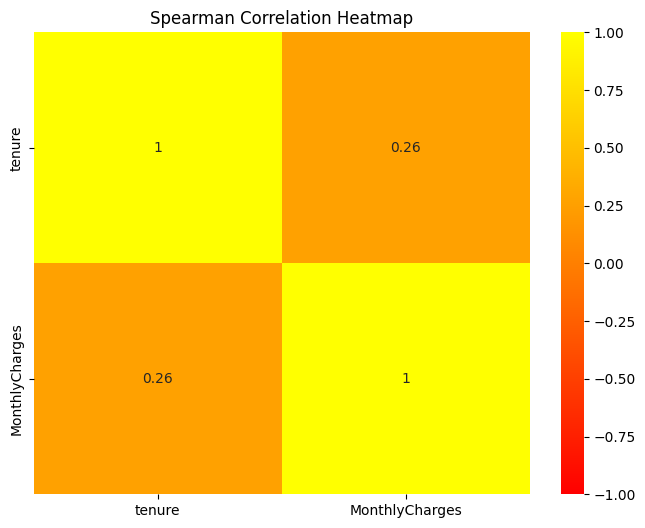

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='autumn', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap');

# plt.savefig('Spearman_Corr.png')

**Insight from observing the heatmap:**

Customers who have been with the company for a longer period (higher tenure) tend to have slightly higher monthly charges. However, the relationship is weak, suggesting that while tenure might play a role in determining monthly charges, there are likely other factors at play as well.

### Outlier Handling

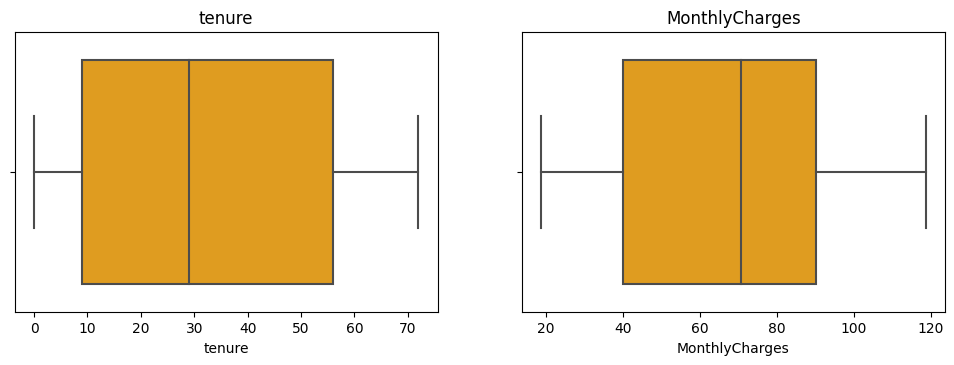

In [79]:
plotnumber = 1

plt.figure(figsize=(12,8))

for cols in num_features:
    plt.subplot(2,2, plotnumber)
    sns.boxplot(data=df, x=cols, color='orange')
    plt.title(cols)
    plotnumber = plotnumber + 1;

# plt.savefig('Outliers_Handling.png')


> There is no ouliers found. So, will proceed into the next step

### Distribution check

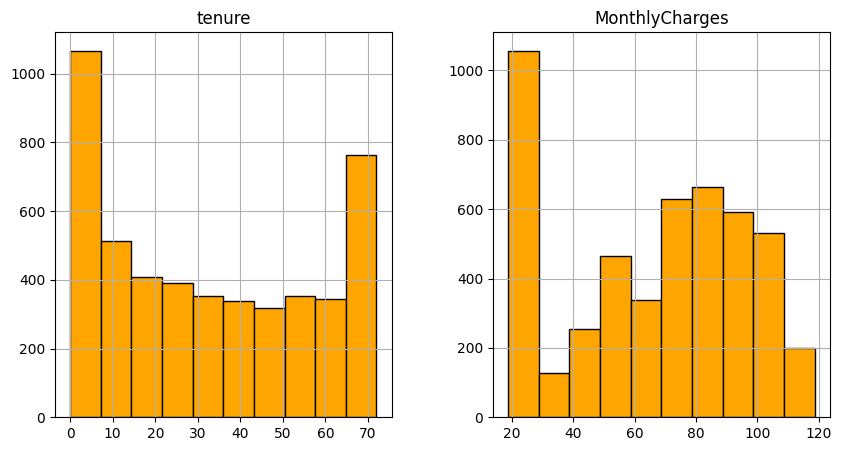

In [80]:
df.hist(figsize=(10,5), color='orange', edgecolor='black');

# plt.savefig('Distribution_Check.png')


> It is clearly seen that the distribution of these features are not normal. Thus, this finding will be used to determine the `scaling method` in `modeling` step

---
## PREPROCESSING
---

### Data Split

In [81]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


In [82]:
# Mapping the target feature

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [83]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

- Stratify is used to avoid skewness in either train or test data which can lead a tendency of the model to understand more to one of the classes only
- Also, it provides consistency across different runs

In [84]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> This table will use as a reference in `Scaling` and `Encoding` step

### Scaling and Encoding

**Step used in *Scaling* and *Encoding***

- **Ordinal Encoding** is chosen to encode `Contract` feature since its value is classified as sequencetial
- **MinMaxScaler** is chosen to scale `Contract`, `tenure`, and `MonthlyCharges` because their distribution is not normal. **RobustScaler** is not used because these 3 features does not contain an outliers
- The rest of the features are encoded by using **OneHotEncoder** because their unique values is not that pleanty which is why **BinaryEncoder** is not necessary in this preprocessing step

In [85]:
# Define ordinal mapping for Contract feature
ordinal_mapping = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]

# Create a transformer
pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping)),
    ('min_max_scaler', MinMaxScaler())
])

transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [86]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

> Transformer is ready to be use in `Model Benchmarking`

---
## MODELING
---

### Model Benchmarking

> Models used in Benchmarking:

1. **Logistic Regression**, is a statistical model that utilizes a logistic function to model a binary dependent variable based on one or more independent variables. The output is a probability that the given input point belongs to a certain class, which is transformed into a binary outcome via a threshold (e.g., if the output probability is greater than 0.5, classify as class 1, otherwise class 0)

1. **K-Nearest Neighbors**, is a non-parametric, instance-based learning algorithm that classifies a data point based on the majority class among its K-nearest neighbors in the feature space. The algorithm computes the distance between the target data point and all other points, selects the K-nearest points, and assigns the most common class label among those neighbors to the target point

1. **Decision Trees**, split the data into subsets based on the value of input features, making the split decisions at each node based on the value that minimizes a certain criterion (e.g., Gini impurity or entropy). This process is recursively performed, resulting in a tree-like model of decisions, where each path from the root of the tree to a leaf represents a decision path that ends in a predicted class label

1. **XGBoost**, is an ensemble learning method that builds multiple weak learners, typically decision trees, in a sequential manner, where each tree tries to correct the errors made by the previous one. It employs gradient boosting framework at its core, which minimizes a loss function by iteratively adding the predictions of new trees to the ensemble

1. **Gradient Boosting**, is an ensemble learning technique that builds a series of weak learners, typically decision trees, where each tree tries to correct the errors of the previous one in a sequential manner. It minimizes a loss function by iteratively adding the predictions of new trees to the ensemble, guided by the gradient of the loss function

1. **Random Forest**, is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes from individual trees for classification problems, or mean prediction of the individual trees for regression problems. By aggregating the predictions of multiple decision trees, it reduces overfitting and provides higher accuracy, making it a robust and versatile machine learning algorithm for a wide range of data scenarios.

> Resampling method is used in this benchmarking because the target classes (0 & 1) is `imbalanced`. This is to avoid to model to understand one class more than the other. The methods used are:


1. **Random Under-Sampling (RUS)**: reduces the number of instances from the over-represented class(es) to balance the class distribution, potentially discarding useful data.

1. **Random Over-Sampling (ROS)**: replicates instances from the under-represented class(es) to balance the class distribution, which may lead to overfitting.

1. **Synthetic Minority Over-sampling Technique (SMOTE)**: generates synthetic samples from the minority class by selecting nearest neighbors in the feature space, aiding in overcoming the overfitting problem.

1. **NearMiss**: is an under-sampling technique that selects examples from the majority class based on their average distance to the three nearest neighbors in the minority class, aiming to provide a balanced dataset.

1. **SMOTEENN (SMOTE + Edited Nearest Neighbors)**: combines over-sampling of the minority class using SMOTE with cleaning of the majority class using Edited Nearest Neighbors to provide a balanced and noise-free dataset.

> Four metrics (`balanced accuracy`, `recall`, `precision`, `F1`) are used to evaluate the model benchmarking and will be more focused on `Recall` since in this project, the `FN` is more risky than `FP` as explained above at the **Define Case** statement


> Lastly, `Cross-Validate` is used to estimate the skill of machine learning models. It involves partitioning the original training data set into a set of subsets or *folds*, then training the algorithm on a subset of the folds while evaluating it on the remaining fold. The process is repeated until every fold has been used as the evaluation set, and the average performance across all folds is computed.

> `StratifiedKFold` is used to ensure each fold is a good representative of the whole, roughly the same proportions of the two types of class labels.

In [88]:
# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# A dictionary containing models used
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Decision Tree': tree,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost,
          }

# A dictionary containing resampling method used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
    'smoteenn': smoteen
}

# A dictionary containing metrics used
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample,resample in resamples.items():
    for name_model,model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,68.205300,58.076362,49.278885,53.270020
1,Logistic Regression,none,70.189861,62.702175,51.452914,56.420427
2,Decision Tree,none,66.417163,49.610483,51.763795,50.630246
3,XGBoost,none,69.079548,59.256016,50.728594,54.609508
4,Random Forest,none,69.064031,60.501062,49.800224,54.504777
5,Gradient Boosting,none,71.065624,65.581219,51.970514,57.939564
6,KNN,ros,70.383142,46.045708,70.806047,55.792686
7,Logistic Regression,ros,76.078991,51.030673,79.916671,62.262013
8,Decision Tree,ros,65.794744,49.414833,50.106832,49.641192
9,XGBoost,ros,71.698123,53.643666,63.149404,57.955656


In [89]:
# Sorting the result according to 'Recall' metrics to see which model gains the highest result

model_bench.sort_values('recall', ascending=False).head()

,model,resample,accuracy,precision,recall,F1
31,Logistic Regression,smoteenn,75.934546,50.065667,81.161263,61.903655
17,Gradient Boosting,rus,75.858471,50.179740,80.747289,61.867449
13,Logistic Regression,rus,75.712100,50.231395,80.229689,61.745296
7,Logistic Regression,ros,76.078991,51.030673,79.916671,62.262013
19,Logistic Regression,smote,75.667846,51.338405,78.158752,61.942168


> After analyzing the model benchmarking in respect to the `Recall` metric, `Logistic Regression` is dominating the top 5 of model ranking. However, Gradient Boosting achieve the 2nd place. The top 3 model will be tested again together with 2 resampling method `SMOTEENN` and `RandomUnderSampling` to predict the test data and further analysis will be made to determine the best model

### Predict to Test data

In [90]:
# Define the chosen models from Model Benchmarking
logreg = LogisticRegression(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
smoteenn = SMOTEENN(random_state=42)
rus = RandomUnderSampler(random_state=42)

models = [
    ('Logistic Regression', logreg),
    ('Gradient Boosting', gboost)
]

resamples = [
    ('SMOTEENN', smoteenn),
    ('RandomUnderSampling', rus)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=index_names)
metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression with SMOTEENN,73.146623,49.629630,83.229814,62.180974
Logistic Regression with RandomUnderSampling,74.382208,51.084813,80.434783,62.484922
Gradient Boosting with SMOTEENN,74.958814,51.890756,76.708075,61.904762
Gradient Boosting with RandomUnderSampling,73.805601,50.392157,79.813665,61.778846


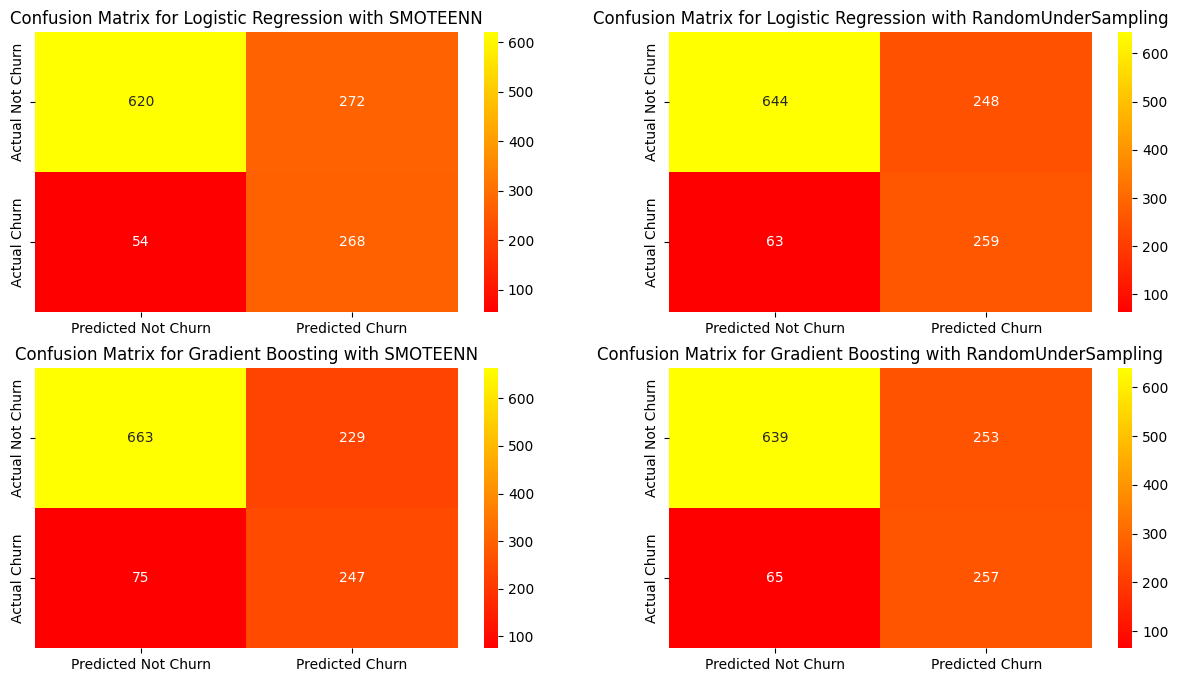

In [91]:
# Display the confusion matrices for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, (model_name, _) in enumerate(models):
    for j, (resample_name, _) in enumerate(resamples):
        sns.heatmap(conf_matrix[2*i + j], annot=True, fmt='d', cmap='autumn',
                    xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                    yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} with {resample_name}");

# plt.savefig('Model_Benchmarking.png')


> After testing the model to predict the test data, `Logistics Regression` with `SMOTEENN` resampling achieves the highest `Recall` at 83% which impacts the `FN` number to be the lowest at 54 customers that are incorrectly predicted **Not Churn** but actually **Churn**. Thus, this model has been chosen as the best model in this project

*Now, let's further increase the `Recall` percentage by performing the hyperparameter tuning to the chosen `Best Model`*

---

### What is Logistic Regression?

Logistic regression is a statistical method and a type of regression analysis used for predicting the probability of a binary outcome or event occurring based on one or more predictor variables. It is widely used in various fields including medicine, finance, marketing, and more. Here is a general explanation and how it works:

**General Explanation**

Logistic regression is used to describe and estimate the relationship between a binary dependent variable and one or more independent variables. The output of logistic regression is a probability that the given input point belongs to a certain class, which is transformed into a binary outcome via a threshold (e.g., if the output probability is greater than 0.5, classify as class 1, otherwise class 0).

**Types of Logistic Regression**

Though generally used for predicting binary target variables, logistic regression can be extended and further classified into three different types that are as mentioned below:

1. Binomial: Where the target variable can have only two possible types. eg.: Predicting a mail as spam or not.

1. Multinomial: Where the target variable have three or more possible types, which may not have any quantitative significance. eg.: Predicting disease.

1. Ordinal: Where the target variables have ordered categories. eg.: Web Series ratings from 1 to 5.

**How It Works**

1. Sigmoid Function: The core of logistic regression is the sigmoid function, also known as the logistic function. It takes any real-valued number and maps it between 0 and 1, making it useful for a probability estimate.

1. Estimating the Coefficients: The coefficients are estimated using maximum likelihood estimation. This method finds the best-fitting logistic curve by maximizing the likelihood of observing the given set of data.

1. Predicting the Probability: Once the coefficients are estimated, they can be used to predict the probability of a binary outcome for a given set of predictor variables.

1. Setting a Threshold: To classify the outcomes into one of the two categories, a threshold is set, commonly at 0.5. If the predicted probability is greater than the threshold, the outcome is classified as class 1, and if it is less than the threshold, it is classified as class 0.

1. Features and Variables: Logistic regression can work with both continuous and categorical predictor variables. It can also be extended to include multiple predictor variables (multivariable logistic regression) and to handle situations where the outcome can belong to more than two categories (multinomial logistic regression).

1. Model Evaluation: The performance of a logistic regression model can be evaluated using various metrics such as accuracy, precision, recall, F1-score, ROC-AUC, etc. Confusion matrix can be used to understand the true positives, true negatives, false positives, and false negatives.

1. Applications: Logistic regression is used in various fields for binary classification problems. For example, it can be used to predict whether an email is spam or not, whether a tumor is malignant or benign, whether a customer will churn or not, etc.

**Advantages and Disadvantages**

*Advantages:*

1. Simple and computationally not intensive.
1. Provides probabilities as output.
1. Well-suited for binary classification problems.

*Disadvantages:*

1. Assumes a linear relationship between the logit of the response variable and the predictor variables.
1. Can be outperformed by more complex models on datasets with many features or complex relationships.

In [92]:
# Modify the metrics_df dataframe to prepare it in storing the hyperparameter tuning result

metrics_df = metrics_df.rename(index={'Logistic Regression with SMOTEENN': 'Logistic Regression before Tune'})
metrics_df = metrics_df.loc[['Logistic Regression before Tune']]
metrics_df


,Accuracy,Precision,Recall,F1
Logistic Regression before Tune,73.146623,49.62963,83.229814,62.180974


### Hyperparameter Tuning

> Hyperparameter space used in **Tuning** the `Logistic Regression` model

1. **Penalty**: It specifies the type of regularization to be used on the logistic regression model, which can help prevent overfitting by adding a penalty to the complexity of the model

1. **C**: It controls the inverse of the regularization strength, with smaller values specifying stronger regularization to help prevent overfitting

1. **Solver**: It defines the algorithm to be used in the optimization problem, affecting the speed and quality of the model training process

1. **Max_iter**: It sets the maximum number of iterations for the solver to converge, ensuring that the optimization process terminates in a reasonable amount of time

> The **Tuning** method used is `Grid Search`:

- A methodical approach for tuning hyperparameters where every combination of the specified hyperparameter values is evaluated to find the best model. Unlike `randomized search`, which samples from a distribution of hyperparameters, `grid search` examines all possible hyperparameter combinations, providing a comprehensive exploration of the search space, however it will sacrifice at a higher computational cost.
- Since the data is not very big, this method will be used to ensure the more precise and reliable hyperparameter tuning result

#### 1st Hyperparameter Tuning

In [93]:
# Define Hyperparameter space for the 1st Tuning process

hyperparam_space = {
    'model__penalty': [None, 'l2', 'l1', 'elastic-net'], #
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga', 'lbfgs'],
    'model__max_iter': [100, 500, 1000],
}

logreg = LogisticRegression(random_state=42)
smoteenn = SMOTEENN(random_state=42)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,  # specifies the range of hyperparameter values to be explored in the grid search
    cv=5,  # specifies the number of folds to be used for cross-validation to evaluate the model
    scoring = 'recall',   # defines the metric used to evaluate the hyperparameter combinations and select the best model
    n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('min_max_scaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Contract'],
                                                                                                         mapping=[{'col': 'Contract',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Month-to-month    0
One year          1
Two year          2
dtype: i...
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': [None, 'l2', 'l1', 'elastic-net'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='recall')

In [94]:
# Show the chosen parameters by the 1st Grid Search and its Train score

print('Best Hyperparameters: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)

Best Hyperparameters:  {'model__C': 0.01, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Score:  0.8985470861599273


In [95]:
# Assigning the best found model during the 1st grid search

logreg_tuning = gridsearch.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('pipe_ordinal_scale',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['Contract'],
                                                                                  mapping=[{'col': 'Contract',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Contract']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling'])])),
                ('resampling', SMOTEENN(random_state=42)),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])

In [96]:
# Use the chosen best model from the 1st Grid search to predict the test data

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100


logreg_after_tuning = pd.DataFrame({'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                   'Recall': recall_logreg_tuning,
                                   'F1': f1_logreg_tuning}, index=['Logistic Regression After 1st Tune'])
metrics_df = pd.concat([logreg_after_tuning, metrics_df])
metrics_df


,Accuracy,Precision,Recall,F1
Logistic Regression After 1st Tune,68.286656,44.976077,87.577640,59.430980
Logistic Regression before Tune,73.146623,49.629630,83.229814,62.180974


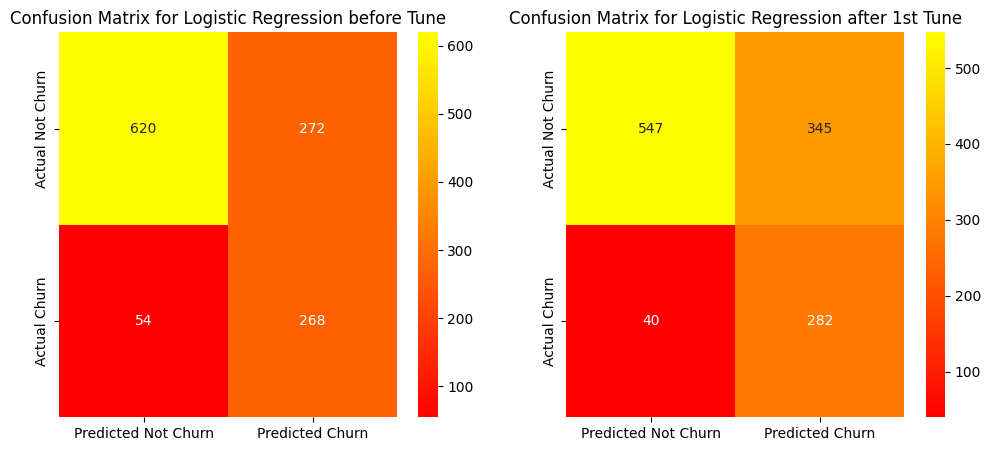

In [97]:
# Get the confusion matrix for the 1st Tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_logreg_tuning)

# Create a new list to store only the Logistic Regression models and their confusion matrices
logreg_models = [models[0], ('Logistic Regression', logreg_tuning)]
logreg_conf_matrices = [conf_matrix[0], conf_matrix_tuned]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Subplot with 1 row and 2 columns
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='autumn',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(logreg_models) - 1 else ' after 1st Tune'));


> There is a significant increase of `Recall` between model before Tune and after Tune. The number of `FN` also decrease after tuning the model. Well, before starting the analysis, let's perform the 2nd Tuning by narrowing the hyperparameter space value according to the `Best parameters` of the 1st Tuning. This aims to see if the model can further increase the `Recall` percentage

#### 2nd Hyperparameter Tuning

In [98]:
# Define Hyperparameter space for the 2nd Tuning process

hyperparam_space = {
    'model__penalty': [None, 'l2', 'l1', 'elastic-net'], #
    'model__C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'model__solver': ['liblinear', 'saga', 'lbfgs'],
    'model__max_iter': [150, 125, 100, 75, 50],
}

logreg = LogisticRegression(random_state=42)
smoteenn = SMOTEENN(random_state=42)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define Grid Search
gridsearch2 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,  # specifies the range of hyperparameter values to be explored in the grid search
    cv=5,   # specifies the number of folds to be used for cross-validation to evaluate the model
    scoring = 'recall',   # defines the metric used to evaluate the hyperparameter combinations and select the best model
    n_jobs = -1   # to speed up the process by utilizing multiple cores of the machine
)

gridsearch2.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('min_max_scaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Contract'],
                                                                                                         mapping=[{'col': 'Contract',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Month-to-month    0
One year          1
Two year          2
dtype: i...
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'model__max_iter': [150, 125, 100, 75, 50],
                         'model__penalty': [None, 'l2', 'l1', 'elastic-net'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='recall')

In [99]:
# Show the chosen parameters by 2nd Grid Search and its Train score

print("Best Hyperparameters: ", gridsearch2.best_params_)
print("Best Score: ", gridsearch2.best_score_)

Best Hyperparameters:  {'model__C': 0.005, 'model__max_iter': 150, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Score:  0.9420169862721008


In [100]:
# Assigning the best found model during the 2nd grid search

logreg_tuning2 = gridsearch2.best_estimator_
logreg_tuning2.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('pipe_ordinal_scale',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['Contract'],
                                                                                  mapping=[{'col': 'Contract',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Contract']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling'])])),
                ('resampling', SMOTEENN(random_state=42)),
                ('model',
                 LogisticRegression(C=0.005, max_iter=150, penalty='l1',
                                    random_state=42, solver='saga'))])

In [101]:
# Use the chosen best model from the 2nd Grid search to predict the test data

y_pred_logreg_tuning2 = logreg_tuning2.predict(X_test)

accuracy_logreg_tuning2 = accuracy_score(y_test, y_pred_logreg_tuning2) * 100
precision_logreg_tuning2 = precision_score(y_test, y_pred_logreg_tuning2) * 100
recall_logreg_tuning2 = recall_score(y_test, y_pred_logreg_tuning2) * 100
f1_logreg_tuning2 = f1_score(y_test, y_pred_logreg_tuning2) * 100


logreg_after_tuning2 = pd.DataFrame({'Accuracy': accuracy_logreg_tuning2,
                                   'Precision': precision_logreg_tuning2,
                                   'Recall': recall_logreg_tuning2,
                                   'F1': f1_logreg_tuning2}, index=['Logistic Regression 2nd Tune'])
metrics_df = pd.concat([logreg_after_tuning2, metrics_df])
metrics_df


,Accuracy,Precision,Recall,F1
Logistic Regression 2nd Tune,61.449753,40.135135,92.236025,55.932203
Logistic Regression After 1st Tune,68.286656,44.976077,87.577640,59.430980
Logistic Regression before Tune,73.146623,49.629630,83.229814,62.180974


> It is clearly seen that there is a significant increase for the model after applying the hyperparameter tuning where `Tune 2` has the highest `Recall` eventhough the `Precision` is sacrificed to get lower and lower due to the *Trade Off* between them. Well, let's take a closer look by creating a `Confusion Matrix` to further analyze the model

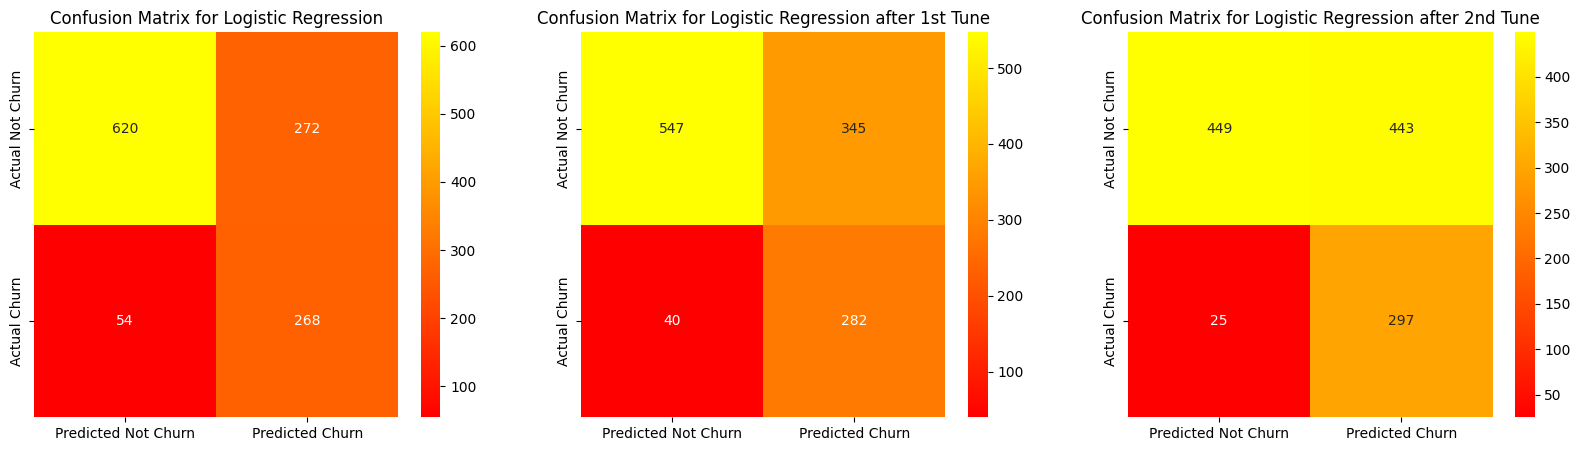

In [102]:
# Get the confusion matrix for the 2nd Tuning
conf_matrix_tuned2 = confusion_matrix(y_test, y_pred_logreg_tuning2)

# Create a new list to store only the Logistic Regression models and their confusion matrices
logreg_models = [models[0], ('Logistic Regression after 1st Tune', logreg_tuning), ('Logistic Regression after 2nd Tune', logreg_tuning2)]
logreg_conf_matrices = [conf_matrix[0], conf_matrix_tuned, conf_matrix_tuned2]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # subplot with 1 row and 3 columns
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='autumn',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {name}");

# plt.savefig('ConfMatrix_Tuning.png')

> From the above confusion matrix, the `Hyperparameter Tuning` has successfully decreased the number of `FN` remarkably but the predicted `FP` seems to get very high in which almost has an even number to `TP`. Thus, to help us decide which one (among `Model before Tune`, `Model Tune 1`, `Model Tune 2`) is the **FINAL MODEL**, let's simulate them into a **Case Study** where we will calculate the *Business Cost* and see how much *Cost Spent* has been reduced by these models

---
## Customer Retention Cost (CRC) CASE STUDY
---

> This case study aims to help us decice which model will be used as our **Final Machine Learning Model** by simulating the `Retention Cost` and how effective this model can reduce the Cost Spent in **Customer Retention Cost Strategy**. This study case is based on the formulated `Problem Statement` at the beginning of this project


### **Retention Cost Calculation**

According to Problem Statement, One well-known critical business statistic is **"The cost of retaining an existing customer is far less than the cost of acquiring a new one"**. Furthermore, according to this [link](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs#:~:text=The%20cost%20of%20acquiring%20new,customers%20you%20have%20already%20captured.), it said that **The cost of acquiring new customers is five times higher than the cost of retaining existing customers**. Thus, this statement will be used our reference in simulating the `Retention Cost`

>  **Cost Spent Simulation:**

- True Positive (TP): These are the customers that the model correctly identified as going to churn. The company would ideally want to retain these customers by offering some incentives or discounts, which would incur a retention cost.

  $Cost: TP \times Retention Cost = TP \times \$1$

- True Negative (TN): These are the customers that the model correctly identified as not going to churn. There's no action needed for these customers from a retention or acquisition perspective.

  $Cost: 0 (No Cost)$

- False Positive (FP): These are the customers that the model incorrectly identified as going to churn, but they actually do not churn. The company might spend money to retain these customers unnecessarily.

  $Cost: FP \times Retention Cost = FP \times \$1$

- False Negative (FN): These are the customers that the model incorrectly identified as not going to churn, but they actually churn. The company would need to acquire new customers to replace these churned customers, which would incur an acquisition cost.

  $Cost: FN \times Acquisition Cost = FN \times \$5$

> **First, Let's calculate the Cost Spent without a model**:

- Let's say we will treat them all as possibly churn which is why we will try to retain them. We can calculate the total customer in test data by:

  $(TP+FP+TN+FN) \times \$1 = (268+272+620+54) \times \$1 = \$1,214$

> **Cost Spent With model**:
    
- By using this ML model, we will only try to retain several customers that are predicted to Churn while the other will be treated as usual
- However, the model still have a possibility to predict incorrectly
- Thus, The Formula to calculate the cost spent for these particular customer is:

  $Total Cost = (TP \times Retain Cost) + (FP \times Retain Cost) + (FN \times Acquisition Cost)$

- Let's apply this formula for the 3 obtained Model:

1. **Logreg before Tune**

  $Total Cost = (268 \times \$1) + (272 \times \$1) + (54 \times \$5) = \$620 + \$272 + \$270 = \$810$

1. **Logreg after Tune 1**

  $Total Cost = (282 \times \$1) + (345 \times \$1) + (40 \times \$5) = \$547 + \$345 + \$200 = \$827$

1. **Logreg after Tune 2**

  $Total Cost = (297 \times \$1) + (443 \times \$1) + (25 \times \$5) = \$449 + \$443 + \$125 = \$865$

### **Retention Cost Verdict**

> The calculated cost are:

1. Without a ML model = $1,214

1. With Logistic Regression model before Tune: $810

1. With Logistic Regression model after 1st Tune: $827

1. With Logistic Regression model after 2nd Tune: $865

---
> This interesting findings has showed us that `Logistic Regression before Tune` is the most effective model as being the lowest `Cost Spent` at \$810 among the others. Thus, this model has been chosen to be our **FINAL MODEL**. The trade off between `FN` and `FP` is a classic challenge in ML modeling. In this case, reducing retention cost by lowering `FN` (which is more costly at \$5) is a *Priority*. Thus, eventhough 2nd Tune achieves a higher recall of 92%, the overall cost is still won by the model before tune.
---

- Well, how much percentage of Retention Cost we have saved by using this **FINAL MODEL**:

  $\text{Cost Spent} = \left( \frac{\text{without model - with model}}{\text{without model}} \right) \times 100\%$

  $\text{Cost Spent} = \left( \frac{\$1,214 - \$810}{\$1,214} \right) \times 100\% \approx 33\%$

- Thus, it can be concluded that this **FINAL MODEL** has reduced the Retention Cost spent by the company at approximately **33%** 💰


# New Section

---
## MODEL INTERPRETATION
---

In [103]:
resample = SMOTEENN(random_state=42)
model = LogisticRegression(random_state=42)

estimator = Pipeline([
    ('transorm', transformer),
    ('resample', resample),
    ('model', model),
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
recall_score(y_test, y_pred)

0.8322981366459627

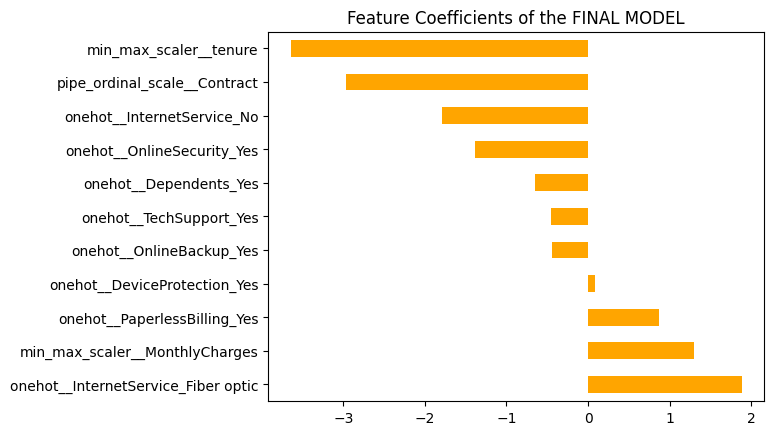

In [104]:
# Assuming logreg_tuning['model'] is your trained Logistic Regression model
coef = pd.Series(estimator['model'].coef_[0], transformer.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='orange');

# plt.savefig('Feature_Importance.png')


> Feature importance from the "Logistic Regression before Tune" model provides a different perspective on the factors influencing customer churn. Discuss below are the breakdown based on the new coefficients:


1. **Positive Influence**:

- The Internet Service (Fiber Optic) and Monthly Charges features have high positive coefficients, indicating that customers with fiber optic internet service or higher monthly charges are more likely to churn. This could suggest dissatisfaction with the fiber optic service or the pricing model, which may need to be reviewed to improve customer retention.

- The Paperless Billing (Yes) feature has a moderate positive influence on churn, possibly reflecting a preference for digital services among a certain demographic that may also be more prone to churn.

- The Device Protection (Yes) feature has a low positive influence on churn, suggesting that having device protection might slightly increase the likelihood of churn, although the influence is much lesser compared to other features.

2. **Negative Influence**:

- Features like Online Backup (Yes), Tech Support (Yes), Dependents (Yes), Online Security (Yes), Internet Service (No), Contract, and Tenure have negative coefficients, indicating that they are associated with a lower likelihood of churn.

- Specifically, longer tenure and contract are strongly associated with lower churn, reflecting customer loyalty and satisfaction over time.

- Additionally, having online security, tech support, online backup, and dependents are associated with lower churn, suggesting that these services or circumstances contribute to customer retention.

- The negative coefficient for Internet Service (No) suggests that customers without internet service are less likely to churn, which might reflect satisfaction with other services provided.

> This discussion underscores the importance of reviewing the pricing and quality of fiber optic internet service, as well as promoting the benefits of online security, tech support, and online backup services to reduce customer churn. The strong negative influence of tenure and contract type on churn also suggests that encouraging longer-term contracts could be a viable strategy for improving customer retention.

---
## Recommendation
---

### Business Sector:

1. **Customer Retention Strategy**: Given the high recall rate, the business can confidently identify most customers who are likely to churn. This provides an opportunity to proactively engage these customers and avoid them from *Churning* such as developing personalized marketing strategies targeting individuals who are predicted to churn, offering them incentives and personalized deals to retain them.

1. **Rewarding the Returned Customer**: Implementing a program to appreciate customers who decide to continue doing business with the company after previously churning. The primary aim is to acknowledge their return, and foster a stronger relationship to ensure their continued patronage. This strategy not only helps in retaining these valuable customers but also in promoting a positive brand image which could, in turn, attract new customers. Moreover, perfect the *Returning procedure* so that the customer will not feel hassle in processing their return

1. **Loyalty Programs**: Introduce loyalty programs that reward customers for staying with the service for a longer time. Rewards could include discounts on monthly bills, free upgrades, or exclusive content and services

1. **Improve Fiber Optic and Network Quality Service**: Continuously monitor and improve them to ensure customer satisfaction. This is based on the Feature Importance where these factors affect the customer decision to Churn. Utilize feedback and data analytics to identify areas with poor network coverage and work on enhancing the network in those areas

1. **Proactive Customer Service**: Develop a proactive customer service approach where customers are contacted before they experience issues. For instance, if a network outage is anticipated in a particular area, informing customers in advance can build trust and reduce frustration

1. **Feedback and Reviews**: Encourage customers to provide feedback and reviews, and actively work on the feedback to improve services. Showcasing positive reviews and testimonials can also build a good reputation and reduce churn

### Machine Learning Modeling sector:

1. **Continuous Monitoring and Updating**: Regularly monitor the performance of the model and update it with fresh data to maintain its predictive accuracy. The telco industry is dynamic, and customer behavior can change over time, impacting the factors driving churn possibility

1. **Experiment with Different Algorithms**: While logistic regression has proven to be the best model so far, continuously experiment with different algorithms to see if any other models can offer better performance. Machine learning is a rapidly evolving field, and new algorithms are being developed regularly

1. **Deployment in Real-Time Systems**: Consider deploying the model in real-time systems to identify potential churn customers as soon as possible. Real-time predictions can enable the business to take immediate actions to retain customers

1. **Model Interpretability Tools**: Focus on improving the interpretability of the model. Being able to understand and explain the model's predictions can be a valuable asset, especially when strategizing interventions to prevent churn. Tools and techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanationscan) be used to understand the impact of different features on the model's predictions

### Data Sector:

1. **Customer Demographics**: Incorporate customer demographic data such as age, gender, occupation, and educational level. Understanding the demographic profile of a customer can provide deeper insights into their preferences and behavior, helping to predict churn more accurately. For instance, Older customers may value stability, trustworthiness, and a proven track record when it comes to choosing a service provider. They believe that a company that has been in business for a longer time is more reliable and quality of service

1. **Churn Rate Calculation**: By regularly calculating and monitoring the churn rate, businesses can gain insights into the effectiveness of their customer retention strategies and take corrective actions when necessary. Provide several features such as *Time Period*, *Initial and Final Customer Count*, *New Customer Acquisition*

1. **Usage Patterns**: Analyze detailed usage patterns, including the time of day when services are most used, the type of services used most frequently, and seasonal usage trends. This data can help in identifying patterns that are indicative of a potential churn

1. **Competitor Analysis**: Understanding the market dynamics and identifying the strengths and weaknesses of competitors in the telecommunications sector. By analyzing competitors' customer retention strategies, pricing models, and service offerings, we can uncover insights that help in refining our own strategies to reduce churn and improve customer satisfaction.

---
## Conclusion
---

The endeavor to develop a machine learning model to predict customer churn has proven to be insightful and meticulous. Among the various models and tuning iterations explored, the Logistic Regression model before tuning emerged as the most cost-effective, reducing the retention cost by approximately 33% compared to a scenario without a machine learning model. This outcome highlighted a classic trade-off between False Negatives (FN) and False Positives (FP), emphasizing the importance of balancing recall and precision to achieve favorable business outcomes. While the 2nd hyperparameter tuning significantly improved recall, but the increase in FP led to a higher overall business cost, showcasing the nuanced challenges in model tuning for this particular business problem.

The feature importance analysis shed light on key factors influencing customer churn, such as internet service type, monthly charges, and contract length, offering actionable intelligence for devising effective customer retention strategies. Recommendations in 3 different sectors have been provided to pave the way for potential improvements in future iterations of this project. The project exemplifies the tangible value that a machine learning can bring to business operations, providing a solid foundation for further optimization, deeper understanding of customer behavior, and retention dynamics. Through continuous improvement and leveraging the insights gained, there's a significant opportunity to further reduce churn-related costs and enhance customer satisfaction and loyalty, ultimately contributing to the company's long-term success and sustainability.

---
## DEPLOYMENT
---

In [105]:
# import pickle

# model = pickle.dump(estimator, open('model.sav', 'wb'))